In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV


In [7]:
# Loading the dataset
df = pd.read_csv('CarPrice_Assignment.csv')

In [9]:
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

(None,
    car_ID  symboling                   CarName fueltype aspiration doornumber  \
 0       1          3        alfa-romero giulia      gas        std        two   
 1       2          3       alfa-romero stelvio      gas        std        two   
 2       3          1  alfa-romero Quadrifoglio      gas        std        two   
 3       4          2               audi 100 ls      gas        std       four   
 4       5          2                audi 100ls      gas        std       four   
 
        carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
 0  convertible        rwd          front       88.6  ...         130   
 1  convertible        rwd          front       88.6  ...         130   
 2    hatchback        rwd          front       94.5  ...         152   
 3        sedan        fwd          front       99.8  ...         109   
 4        sedan        4wd          front       99.4  ...         136   
 
    fuelsystem  boreratio  stroke compressionratio horsepow

In [11]:
# Step 1: Preprocessing

In [14]:
# Splitting 'CarName' to extract brand names
df['CarBrand'] = df['CarName'].apply(lambda x: x.split(' ')[0].lower())

In [16]:
# Correcting common brand name typos
brand_corrections = {
    'maxda': 'mazda', 'porcshce': 'porsche', 'toyouta': 'toyota',
    'vokswagen': 'volkswagen', 'vw': 'volkswagen', 'Nissan': 'nissan'
}
df['CarBrand'] = df['CarBrand'].replace(brand_corrections)

In [18]:
# Dropping columns that are not useful for modeling
df.drop(['car_ID', 'CarName'], axis=1, inplace=True)

In [20]:
# Converting categorical variables to dummy/indicator variables
categorical_cols = df.select_dtypes(include='object').columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [22]:
# Checking for missing values
missing_values = df_encoded.isnull().sum().sum()

In [24]:
# Displaying the shape and columns after preprocessing
df_encoded.shape, df_encoded.columns.tolist(), missing_values

((205, 65),
 ['symboling',
  'wheelbase',
  'carlength',
  'carwidth',
  'carheight',
  'curbweight',
  'enginesize',
  'boreratio',
  'stroke',
  'compressionratio',
  'horsepower',
  'peakrpm',
  'citympg',
  'highwaympg',
  'price',
  'fueltype_gas',
  'aspiration_turbo',
  'doornumber_two',
  'carbody_hardtop',
  'carbody_hatchback',
  'carbody_sedan',
  'carbody_wagon',
  'drivewheel_fwd',
  'drivewheel_rwd',
  'enginelocation_rear',
  'enginetype_dohcv',
  'enginetype_l',
  'enginetype_ohc',
  'enginetype_ohcf',
  'enginetype_ohcv',
  'enginetype_rotor',
  'cylindernumber_five',
  'cylindernumber_four',
  'cylindernumber_six',
  'cylindernumber_three',
  'cylindernumber_twelve',
  'cylindernumber_two',
  'fuelsystem_2bbl',
  'fuelsystem_4bbl',
  'fuelsystem_idi',
  'fuelsystem_mfi',
  'fuelsystem_mpfi',
  'fuelsystem_spdi',
  'fuelsystem_spfi',
  'CarBrand_audi',
  'CarBrand_bmw',
  'CarBrand_buick',
  'CarBrand_chevrolet',
  'CarBrand_dodge',
  'CarBrand_honda',
  'CarBrand_isuz

In [26]:
# Separating features and target
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

In [28]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR()
}

In [32]:
# Training and evaluating models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'R2 Score': r2_score(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred)
    }


In [34]:
# Converting results to a DataFrame for easy comparison
results_df = pd.DataFrame(results).T.sort_values(by='R2 Score', ascending=False)
results_df

,R2 Score,MSE,MAE
Random Forest,0.958417,3.282767e+06,1288.825012
Gradient Boosting,0.924181,5.985429e+06,1710.336389
Linear Regression,0.909701,7.128547e+06,1763.565986
Decision Tree,0.906907,7.349134e+06,1782.589439
Support Vector Regressor,-0.101980,8.699470e+07,5707.132621


In [36]:
# Feature importance from Random Forest
rf_model = models['Random Forest']
importances = rf_model.feature_importances_
features = X.columns

In [38]:
# Creating a DataFrame for better visualization
feat_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

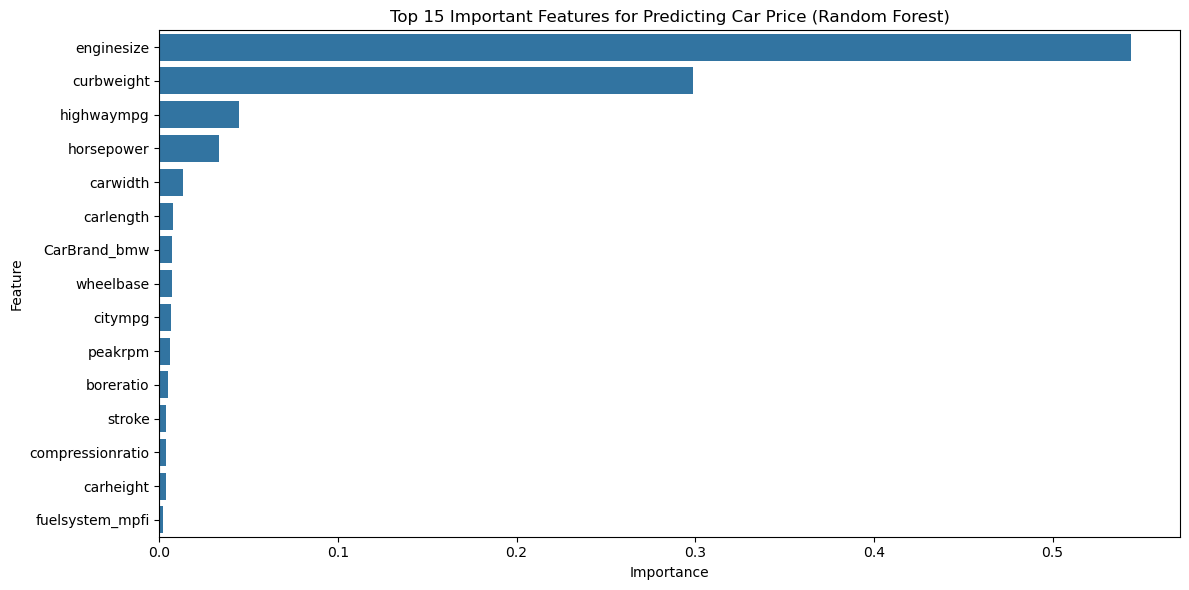

In [40]:
# Plotting top 15 features
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df.head(15))
plt.title('Top 15 Important Features for Predicting Car Price (Random Forest)')
plt.tight_layout()
plt.show()

In [42]:
# Displaying top 10 features
feat_importance_df.head(10)

,Feature,Importance
6,enginesize,0.544159
5,curbweight,0.298449
13,highwaympg,0.044743
10,horsepower,0.033483
3,carwidth,0.013090
2,carlength,0.007767
44,CarBrand_bmw,0.007114
1,wheelbase,0.006991
12,citympg,0.006420
11,peakrpm,0.006174


In [44]:
importances = rf_model.feature_importances_
features = X.columns

feat_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

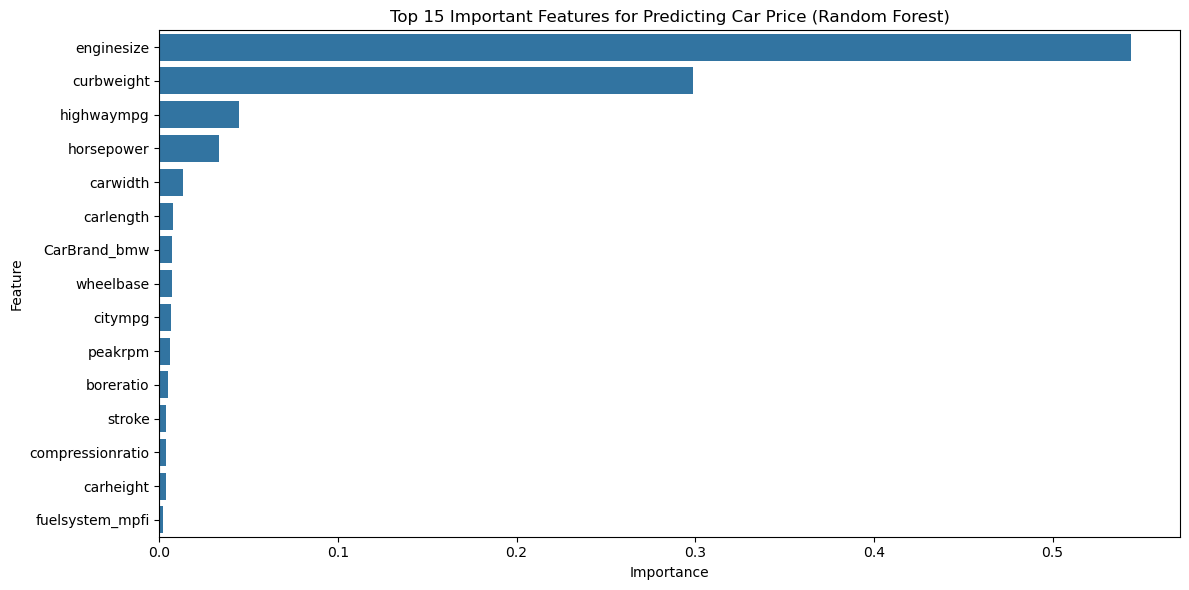

In [48]:
# Plotting top 15
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df.head(15))
plt.title('Top 15 Important Features for Predicting Car Price (Random Forest)')
plt.tight_layout()
plt.show()

In [50]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid,
                           cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best R² Score: 0.8889809113243816
